In [156]:
import tensorflow as tf

In [157]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2020-07-07 10:23:18--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 64.233.187.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   103MB/s    in 0.6s    

2020-07-07 10:23:19 (103 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [158]:
import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

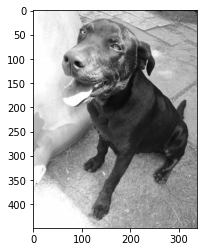

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

DATADIR = r"/tmp/cats_and_dogs_filtered/train"

CATEGORIES = ["dogs", "cats"]

for category in CATEGORIES:  
    path = os.path.join(DATADIR,category) 
    for img in os.listdir(path):  
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
        plt.imshow(img_array, cmap='gray')  
        plt.show() 

        break  
    break 

In [160]:
print(img_array)

[[254 255 254 ...  53  41  38]
 [254 255 254 ...  48  37  35]
 [253 255 254 ...  31  34  32]
 ...
 [254 254 254 ... 147 144 140]
 [254 254 254 ... 143 127 122]
 [254 254 254 ...  99 101 132]]


In [161]:
print(img_array.shape)

(449, 338)


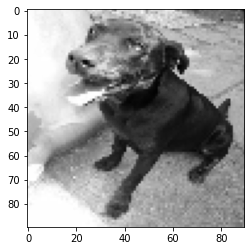

In [162]:
IMG_SIZE = 90

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

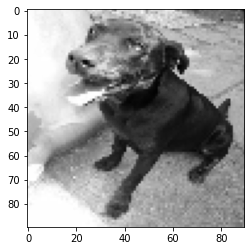

In [163]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [164]:
training_data = []

def create_training_data():
    for category in CATEGORIES:

        path = os.path.join(DATADIR,category)  
        class_num = CATEGORIES.index(category)  

        for img in tqdm(os.listdir(path)): 
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
                training_data.append([new_array, class_num])  
            except Exception as e: 
                pass

create_training_data()

print(len(training_data))

100%|██████████| 1000/1000 [00:01<00:00, 913.15it/s]

2000


In [165]:
training_data[1300] 
# Point 1: training data is containing cat and dog images in a sequence, 0 is for Dog which is up to 12501 and 
#Point 2: after that 1 is for Cat 
#Point 3: we need to be shuffle data

[array([[ 78,  79,  91, ..., 160, 162, 162],
        [103, 102, 108, ..., 159, 164, 160],
        [126, 126, 115, ..., 163, 166, 162],
        ...,
        [135, 134, 150, ..., 131, 129, 127],
        [139, 134, 131, ..., 128, 128, 126],
        [132, 130, 134, ..., 126, 126, 125]], dtype=uint8), 1]

In [166]:
#data shuffling 
import random

random.shuffle(training_data)

In [167]:
#now data shuffled so print categories if they are also in shuffled manner
for i in range(5):
    print(training_data[i][1])  

0
0
1
0
1


In [168]:
for sample in training_data[:10]:
    print(sample[1])

0
0
1
0
1
0
0
1
0
0


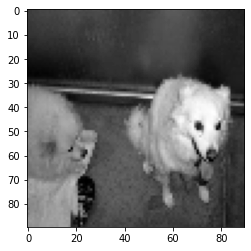

In [169]:
plt.imshow(training_data[0][0], cmap='gray')
plt.show()

In [170]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
y = np.array(y)

In [171]:
type(X)
X.dtype
y = np.array(y)
type(y)

numpy.ndarray

In [172]:
print(X.shape, y.shape)
print(X.dtype, y.dtype)


(2000, 90, 90) (2000,)
uint8 int64


In [173]:
X= tf.cast(X, np.float32)
print(X.dtype, y.dtype)
# Normalize images value as max value is 255
X= X / 255

#checking shape for all and unique labels in target
np.unique(y)

<dtype: 'float32'> int64


array([0, 1])

Traing Set Sample Display:
1199
 image no:1199   Label:1


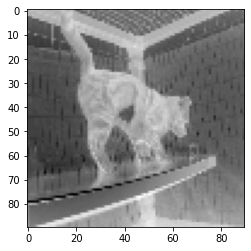

In [174]:
#display image from train set and test set
def display_image_label(featureset, labelset):
  img_no= np.random.randint(0, featureset.shape[0])
  print(img_no)
  img = featureset[img_no]
  label= labelset[img_no]
  print(f" image no:{img_no}   Label:{label}") # multiplying with 255 as we scaled with it
  plt.imshow(img, cmap=plt.cm.binary)
  plt.show()
  
print("Traing Set Sample Display:\n","="*50)
display_image_label(X, y)



In [175]:
#Dataset Parameters
num_classes = 2 # (0-1 digits).
image_vector_size = 8100 # (img shape: 90*90)

# Training parameters.
learning_rate = 0.001
training_steps = 6000
batch_size = 55
display_step = 100

# Network parameters.
n_hidden_1 = 128 # hidden layer1
n_hidden_2 = 256 # hidden layer2

In [176]:
x_train=X
x_test = X
y_train = y
# Flatten images  to feed as input
x_train=tf.reshape(x_train, [x_train.shape[0], image_vector_size])
x_test=tf.reshape(x_test, [x_test.shape[0], image_vector_size])

In [177]:

# Use batching of train data
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_data = train_data.repeat().shuffle(5000).batch(batch_size).prefetch(1)

In [178]:
#initialize random normal weights and biases
# Store layers weight & bias

#using random_normal_initializer() of tf r2
normal = tf.random_normal_initializer()

weights = {
    'h1': tf.Variable(normal([image_vector_size, n_hidden_1])),
    'h2': tf.Variable(normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(normal([n_hidden_2, num_classes]))
}
biases = {
    'b1': tf.Variable(tf.zeros([n_hidden_1])),
    'b2': tf.Variable(tf.zeros([n_hidden_2])),
    'out': tf.Variable(tf.zeros([num_classes]))
}

In [179]:
# Create model.
def neural_net(x):
    # Hidden fully connected layer with 128 neurons.
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    # Apply sigmoid to layer_1 output for non-linearity.
    layer_1 = tf.nn.sigmoid(layer_1)
    
    # Hidden fully connected layer with 256 neurons.
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    # Apply sigmoid to layer_2 output for non-linearity.
    layer_2 = tf.nn.sigmoid(layer_2)
    
    # Output fully connected layer with a neuron for each class.
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    # Apply softmax to normalize the logits to a probability distribution.
    return tf.nn.softmax(out_layer)

In [180]:
# Cross-Entropy loss function.
def cross_entropy(y_pred, y_true):
    # Encode label to a one hot vector.
    y_true = tf.one_hot(y_true, depth=num_classes)
    # Clip prediction values to avoid log(0) error.
    y_pred = tf.clip_by_value(y_pred, 1e-9, 1.)
    # Compute cross-entropy.
    return tf.reduce_mean(-tf.reduce_sum(y_true * tf.math.log(y_pred)))

# Accuracy metric.
def accuracy(y_pred, y_true):
    # Predicted class is the index of highest score in prediction vector (i.e. argmax).
    correct_prediction = tf.equal(tf.argmax(y_pred, 1), tf.cast(y_true, tf.int64))
    return tf.reduce_mean(tf.cast(correct_prediction, tf.float32), axis=-1)

# Stochastic gradient descent optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [181]:
# Optimization process. 
def run_optimization(x, y):
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = neural_net(x)
        loss = cross_entropy(pred, y)
        
    # Variables to update, i.e. trainable variables.
    trainable_variables = [weights['h1'],biases['b1'],weights['h2'], biases['b2'], weights['out'], biases['out']]

    # Compute gradients.
    gradients = g.gradient(loss, trainable_variables)
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, trainable_variables))

step: 100, loss: 39.725399017333984, accuracy: 0.4727272689342499
step: 200, loss: 38.712059020996094, accuracy: 0.5636363625526428
step: 300, loss: 39.17116928100586, accuracy: 0.5272727012634277
step: 400, loss: 38.27414321899414, accuracy: 0.5090909004211426
step: 500, loss: 38.21490478515625, accuracy: 0.5454545617103577
step: 600, loss: 37.85603713989258, accuracy: 0.5272727012634277
step: 700, loss: 37.45254135131836, accuracy: 0.581818163394928
step: 800, loss: 37.1827278137207, accuracy: 0.6363636255264282
step: 900, loss: 35.38671875, accuracy: 0.6000000238418579
step: 1000, loss: 35.06113815307617, accuracy: 0.6363636255264282
step: 1100, loss: 38.0638313293457, accuracy: 0.4909090995788574
step: 1200, loss: 36.50031280517578, accuracy: 0.581818163394928
step: 1300, loss: 36.39395523071289, accuracy: 0.5272727012634277
step: 1400, loss: 36.98821258544922, accuracy: 0.581818163394928
step: 1500, loss: 35.98881149291992, accuracy: 0.6727272868156433
step: 1600, loss: 37.9941444

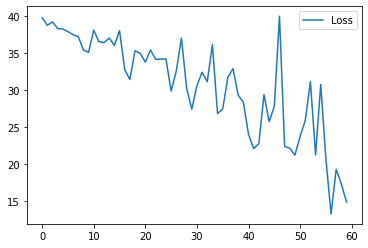

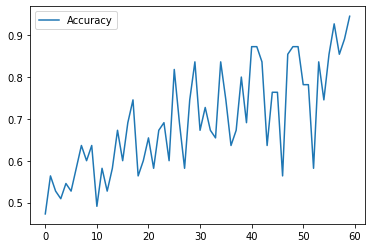

In [182]:
#on training set
#collect loss and accuracy
loss_list, accuracy_list = [], []
# Run training for the given number of steps.
for step, (batch_x, batch_y) in enumerate(train_data.take(training_steps), 1):
    # Run the optimization to update W and b values.
    run_optimization(batch_x, batch_y)
    
    if step % display_step == 0:
        pred = neural_net(batch_x)
        loss = cross_entropy(pred, batch_y)
        loss_list.append(loss)
        acc = accuracy(pred, batch_y)
        accuracy_list.append(acc)
        print(f"step: {step}, loss: {loss}, accuracy: {acc}")
   
  
  
# plot loss and accuracy

def loss_plot(l1):
  plt.plot(l1, label="Loss")
  plt.legend()
  plt.show()

def acc_plot(l2):
  plt.plot(l2, label="Accuracy")
  plt.legend()
  plt.show()
  
#call plot  
loss_plot(loss_list)
acc_plot(accuracy_list)